In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## DATA IMPORTING AND CLEANING!!

In [3]:
df = pd.read_csv('Myntra_Fasion_Clothing.csv')  # <- Replace with your path

print("Dataset shape:", df.shape)
df.head()

C:\Users\karti\AppData\Local\Temp\ipykernel_27664\2411372484.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Myntra_Fasion_Clothing.csv')  # <- Replace with your path


Dataset shape: (526564, 13)


,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [4]:
df['DiscountOffer_clean'] = df['DiscountOffer'].str.extract(r'(\d+)', expand=False).astype(float)

df['has_op'] = df['OriginalPrice (in Rs)'].notna()
df['has_dp'] = df['DiscountPrice (in Rs)'].notna()
df['has_do'] = df['DiscountOffer_clean'].notna()

df['count_present'] = df[['has_op', 'has_dp', 'has_do']].sum(axis=1)


In [5]:
usable_df = df[df['count_present'] >= 2].copy()
usable_df = usable_df[usable_df['Ratings'].notna()]

cols_to_drop = ['URL', 'Description', 'has_op', 'has_dp', 'has_do', 'count_present']
usable_df.drop(columns=cols_to_drop, inplace=True)

usable_df.head()

,Product_id,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,DiscountOffer_clean
0,2296012,Roadster,Bottom Wear,jeans,Men,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,45.0
1,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0,55.0
2,11895958,Roadster,Topwear,shirts,Men,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0,55.0
3,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0,31.0
4,11690882,Roadster,Western,tshirts,Women,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0,35.0


In [6]:
usable_df['DiscountOffer'] = usable_df['DiscountOffer'].str.extract(r'(\d+)', expand=False).astype(float).astype('Int64')

usable_df[['DiscountOffer']].head()

,DiscountOffer
0,45
1,55
2,55
3,31
4,35


In [7]:
clean_df = usable_df.copy()

### CLEANING DONEE!!
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-
## EDA!?

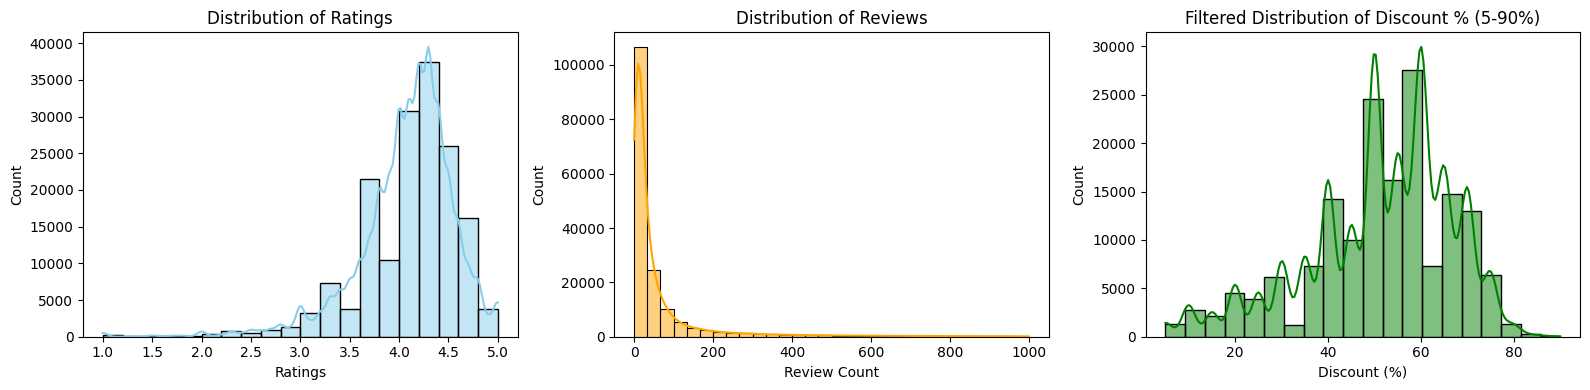

In [8]:
plt.figure(figsize=(16, 4))

clean_df = clean_df[(clean_df['DiscountOffer'] >= 5) & (clean_df['DiscountOffer'] <= 90)]

# Histogram for Ratings
plt.subplot(1, 3, 1)
sns.histplot(clean_df['Ratings'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")

# Histogram for Reviews
plt.subplot(1, 3, 2)
sns.histplot(clean_df['Reviews'], bins=30, kde=True, color='orange')
plt.title("Distribution of Reviews")
plt.xlabel("Review Count")

# Histogram for Discount %
plt.subplot(1, 3, 3)
sns.histplot(clean_df['DiscountOffer'], bins=20, kde=True, color='green')
plt.title("Filtered Distribution of Discount % (5-90%)")
plt.xlabel("Discount (%)")

plt.tight_layout()
plt.show()

C:\Users\karti\AppData\Local\Temp\ipykernel_27664\196753208.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('discount_bucket')
C:\Users\karti\AppData\Local\Temp\ipykernel_27664\196753208.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bucket_summary, x='discount_bucket', y='avg_rating', palette='Blues_d')
C:\Users\karti\AppData\Local\Temp\ipykernel_27664\196753208.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bucket_summary, x='discount_bucket', y='avg_reviews', pal

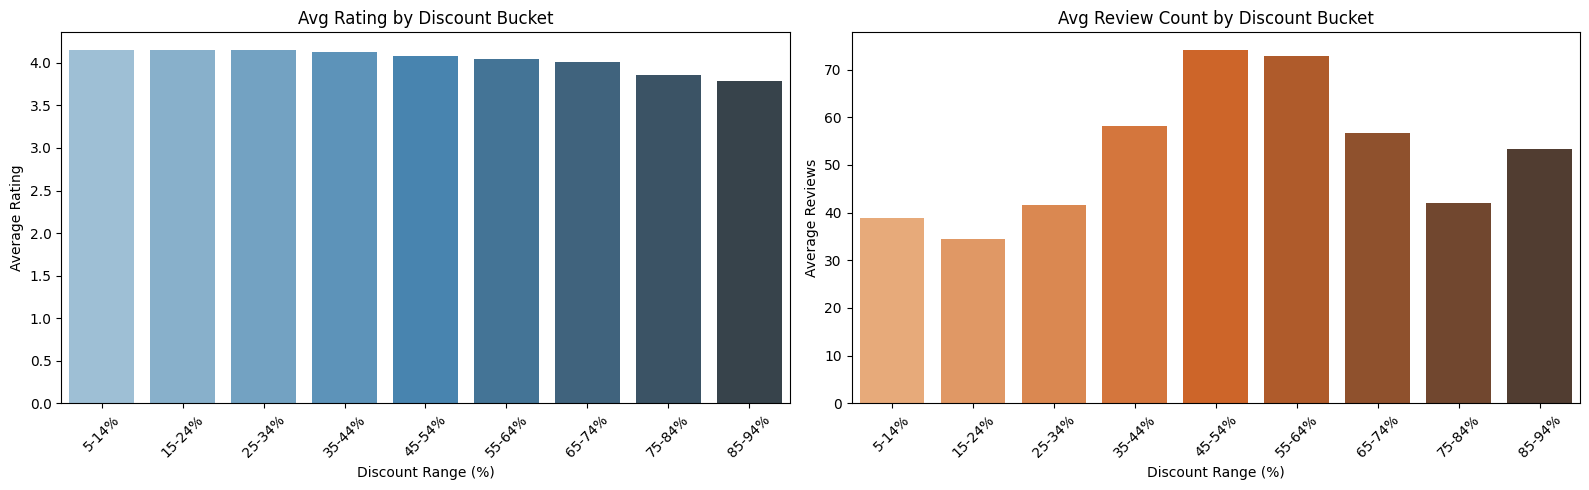

In [9]:
discount_bins = list(range(5, 100, 10))
discount_labels = [f"{low}-{low+9}%" for low in discount_bins[:-1]]

clean_df['discount_bucket'] = pd.cut(
    clean_df['DiscountOffer'],
    bins=discount_bins,
    labels=discount_labels,
    right=True
)

bucket_summary = (
    clean_df
    .groupby('discount_bucket')
    .agg(
        avg_rating=('Ratings', 'mean'),
        avg_reviews=('Reviews', 'mean'),
        product_count=('Ratings', 'count')
    )
    .reset_index()
)

plt.figure(figsize=(16, 5))

# A. Average Ratings
plt.subplot(1, 2, 1)
sns.barplot(data=bucket_summary, x='discount_bucket', y='avg_rating', palette='Blues_d')
plt.title("Avg Rating by Discount Bucket")
plt.xlabel("Discount Range (%)")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)

# B. Average Reviews
plt.subplot(1, 2, 2)
sns.barplot(data=bucket_summary, x='discount_bucket', y='avg_reviews', palette='Oranges_d')
plt.title("Avg Review Count by Discount Bucket")
plt.xlabel("Discount Range (%)")
plt.ylabel("Average Reviews")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\karti\AppData\Local\Temp\ipykernel_27664\3636318695.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['discounted_price_bin', 'original_price_tier'])


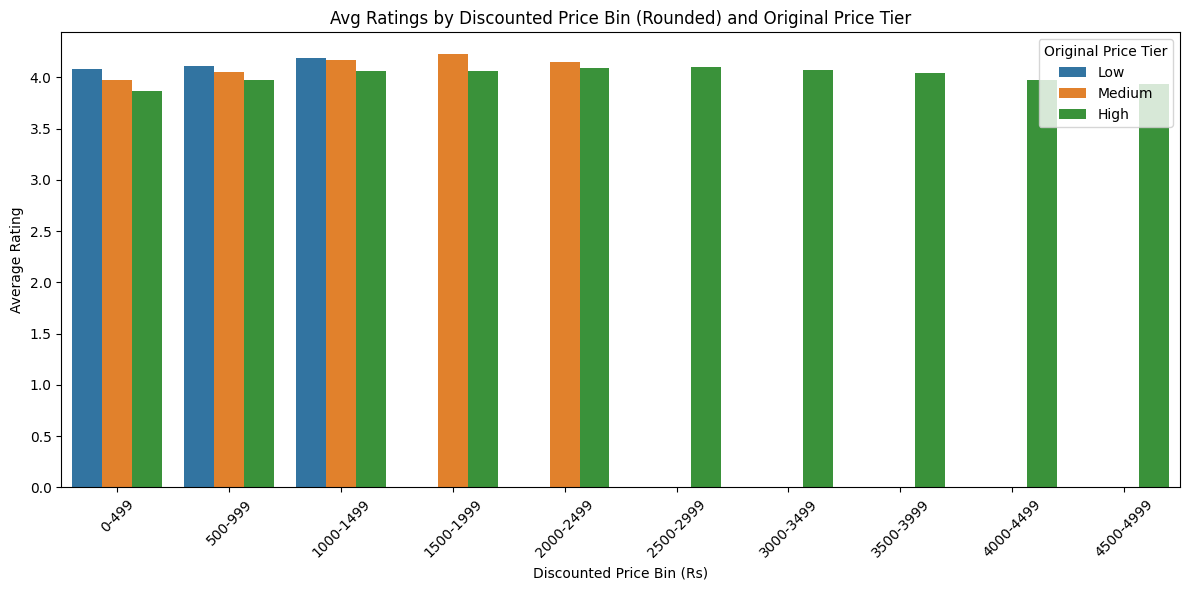

In [10]:
price_df = clean_df[
    clean_df['DiscountPrice (in Rs)'].notna() &
    clean_df['OriginalPrice (in Rs)'].notna()
].copy()

price_df['original_price_tier'] = pd.qcut(price_df['OriginalPrice (in Rs)'], q=3, labels=['Low', 'Medium', 'High'])

bin_edges = list(range(0, 5500, 500))
price_df['discounted_price_bin'] = pd.cut(
    price_df['DiscountPrice (in Rs)'],
    bins=bin_edges,
    right=False,
    include_lowest=True,
    labels=[f"{b}-{b+499}" for b in bin_edges[:-1]]
)

rating_comparison = (
    price_df
    .groupby(['discounted_price_bin', 'original_price_tier'])
    .agg(avg_rating=('Ratings', 'mean'), count=('Ratings', 'count'))
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=rating_comparison, x='discounted_price_bin', y='avg_rating', hue='original_price_tier')
plt.xticks(rotation=45)
plt.title('Avg Ratings by Discounted Price Bin (Rounded) and Original Price Tier')
plt.xlabel('Discounted Price Bin (Rs)')
plt.ylabel('Average Rating')
plt.legend(title='Original Price Tier')
plt.tight_layout()
plt.show()


C:\Users\karti\AppData\Local\Temp\ipykernel_27664\834310849.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['category_by_Gender', 'discount_bucket'])


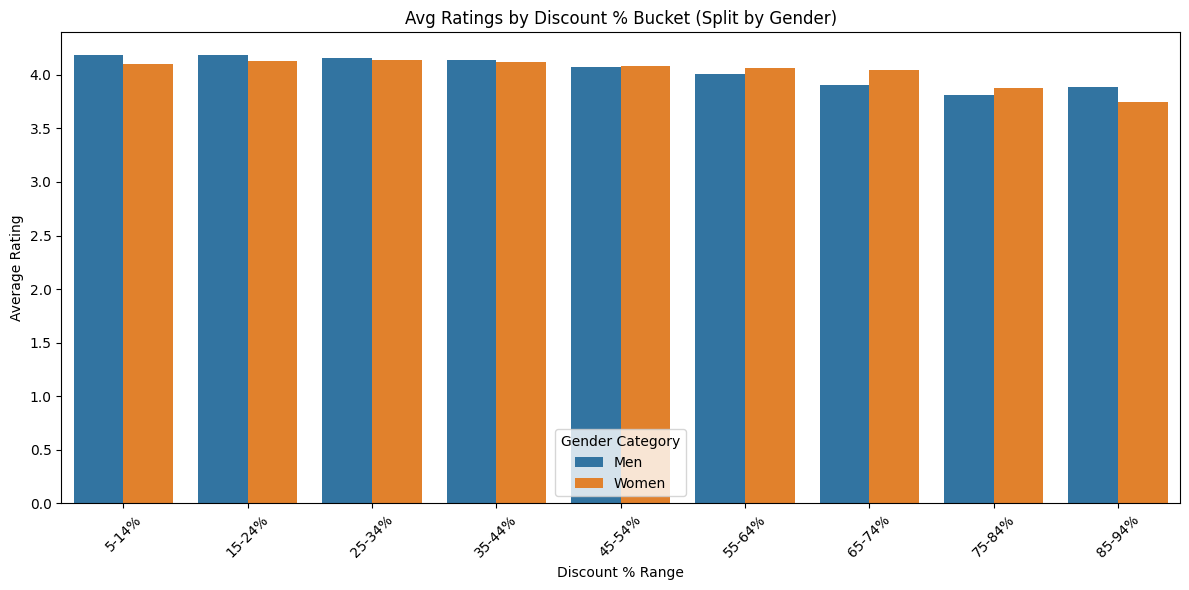

In [11]:
gender_rating = (
    clean_df
    .groupby(['category_by_Gender', 'discount_bucket'])
    .agg(avg_rating=('Ratings', 'mean'), count=('Ratings', 'count'))
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=gender_rating, x='discount_bucket', y='avg_rating', hue='category_by_Gender')
plt.title("Avg Ratings by Discount % Bucket (Split by Gender)")
plt.xlabel("Discount % Range")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.legend(title="Gender Category")
plt.tight_layout()
plt.show()


In [12]:
brand_summary = (
    clean_df
    .groupby('BrandName')
    .agg(
        avg_rating=('Ratings', 'mean'),
        avg_discount=('DiscountOffer', 'mean'),
        product_count=('Ratings', 'count')
    )
    .query("product_count > 100")  # filter to focus on relevant brands
    .sort_values(by='avg_rating', ascending=False)
    .reset_index()
)

In [13]:
#adding a weighted rating column, inspired by IMDB's weighted rating formula:
# https://www.imdb.com/help/show_leaf?weightedratings

# Compute global average rating (C) and review threshold (m)
C = clean_df['Ratings'].mean()
m = 100  # minimum number of ratings to consider fully "trustworthy"

# Add weighted rating to brand_summary
brand_summary['weighted_rating'] = (
    (brand_summary['product_count'] / (brand_summary['product_count'] + m)) * brand_summary['avg_rating'] +
    (m / (brand_summary['product_count'] + m)) * C
).round(3)  # round for neatness

# Preview updated dataframe with weighted rating
brand_summary[['BrandName', 'avg_rating', 'product_count', 'weighted_rating']].sort_values(
    by='weighted_rating', ascending=False).head(10)

,BrandName,avg_rating,product_count,weighted_rating
3,Dreamz by Pantaloons,4.437299,311,4.350
0,Calvin Klein Underwear,4.555645,124,4.342
2,EXTRA LOVE BY LIBAS,4.441748,206,4.322
12,Marks & Spencer,4.350508,590,4.311
7,Nautica,4.370270,333,4.302
1,I like me,4.466142,127,4.295
4,Divena,4.395918,196,4.288
10,Triumph,4.362687,268,4.285
20,U.S. Polo Assn.,4.304246,895,4.281
15,DILLINGER,4.324634,410,4.276


C:\Users\karti\AppData\Local\Temp\ipykernel_27664\2580618125.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom, x='weighted_rating', y='BrandName', palette='coolwarm')


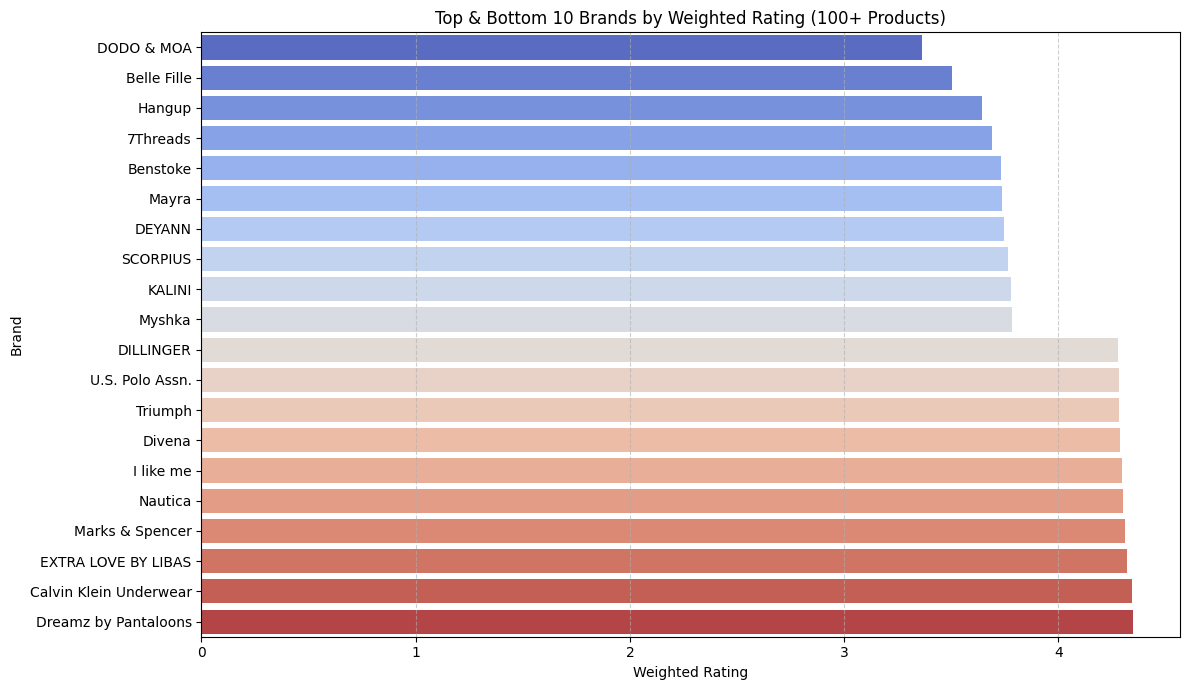

In [14]:
#Plot top and bottom 10 brands by weighted rating:

top10 = brand_summary.sort_values(by='weighted_rating', ascending=False).head(10)
bottom10 = brand_summary.sort_values(by='weighted_rating', ascending=True).head(10)

# Combine and sort for plotting
top_bottom = pd.concat([bottom10, top10]).sort_values(by='weighted_rating')

# Plot horizontal barplot
plt.figure(figsize=(12, 7))
sns.barplot(data=top_bottom, x='weighted_rating', y='BrandName', palette='coolwarm')
plt.title("Top & Bottom 10 Brands by Weighted Rating (100+ Products)")
plt.xlabel("Weighted Rating")
plt.ylabel("Brand")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### EDA done with Groupwise analysis and pretty visualizations!
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-
## Hypothesis Testing (ANOVA and T-test)
#### H0: Mean ratings across discount buckets are equal
#### H1: At least one discount bucket has a different mean rating

In [15]:
# H0: Mean ratings across discount buckets are equal
# H1: At least one discount bucket has a different mean rating

from scipy.stats import f_oneway

# Filter: include only discount buckets with sufficient data
valid_buckets = clean_df['discount_bucket'].value_counts()
valid_buckets = valid_buckets[valid_buckets > 50].index.tolist()
anova_data = [clean_df[clean_df['discount_bucket'] == b]['Ratings'] for b in valid_buckets]

anova_result = f_oneway(*anova_data)

anova_result.statistic, anova_result.pvalue

(np.float64(239.1683506253968), np.float64(0.0))

### Since the p-value < 0.05, we reject the null hypothesis!

### There is a statistically significant difference in average ratings across discount buckets.

C:\Users\karti\AppData\Local\Temp\ipykernel_27664\3051071090.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clean_df, x='discount_bucket', y='Ratings', palette='coolwarm')


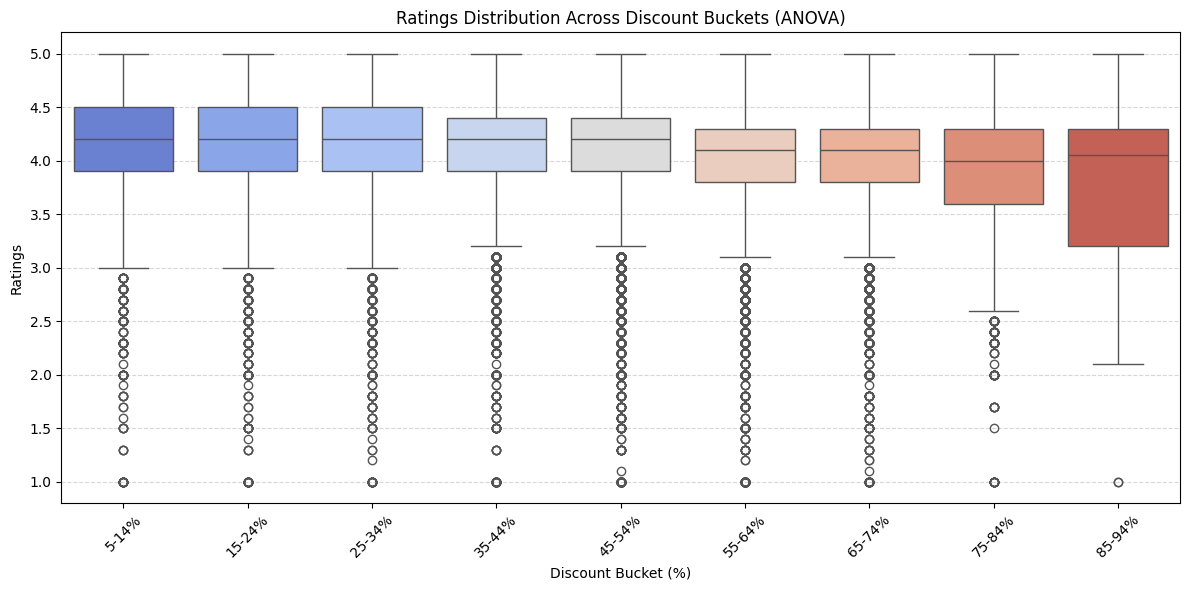

In [16]:
# Plot for ANOVA: Boxplot of Ratings across Discount Buckets
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df, x='discount_bucket', y='Ratings', palette='coolwarm')
plt.title("Ratings Distribution Across Discount Buckets (ANOVA)")
plt.xlabel("Discount Bucket (%)")
plt.ylabel("Ratings")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import ttest_ind

# Define low discount (5–24%) and high discount (65–90%) buckets
low_discount = clean_df[
    clean_df['DiscountOffer'].between(5, 24)
]['Ratings']

high_discount = clean_df[
    clean_df['DiscountOffer'].between(65, 90)
]['Ratings']

# Run t-test
t_stat, p_val = ttest_ind(low_discount, high_discount, equal_var=False)

t_stat, p_val

(np.float64(27.296041926825804), np.float64(1.1429499410619956e-160))

### Since the p-value is way below 0.05, we can confidently reject the null hypothesis:

### There is a significant difference in average ratings between low-discount and high-discount products.

C:\Users\karti\AppData\Local\Temp\ipykernel_27664\1746567917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


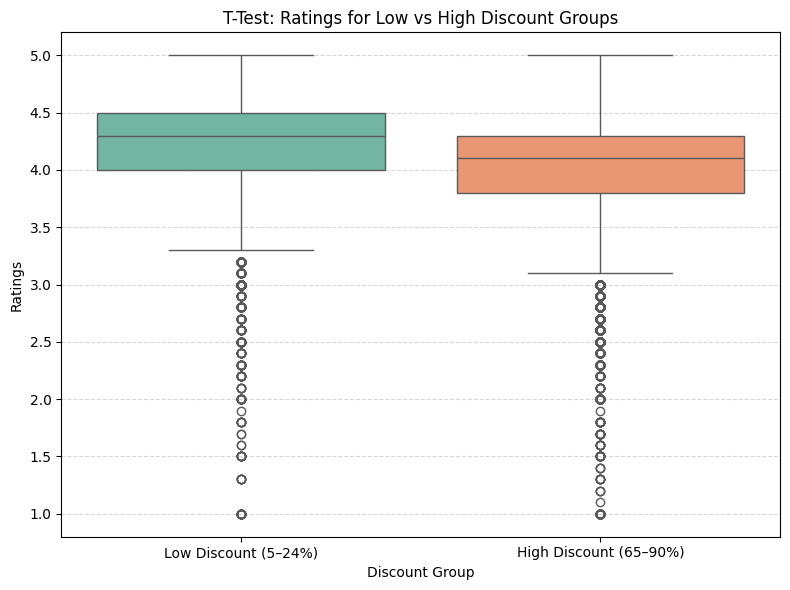

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=clean_df[clean_df['DiscountOffer'].between(5, 24) | clean_df['DiscountOffer'].between(65, 90)].assign(
        discount_group=lambda df: pd.cut(
            df['DiscountOffer'],
            bins=[0, 24, 90],
            labels=['Low Discount (5–24%)', 'High Discount (65–90%)']
        )
    ),
    x='discount_group',
    y='Ratings',
    palette='Set2'
)
plt.title("T-Test: Ratings for Low vs High Discount Groups")
plt.xlabel("Discount Group")
plt.ylabel("Ratings")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Hypothesis testing done!
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-
## Correlation:

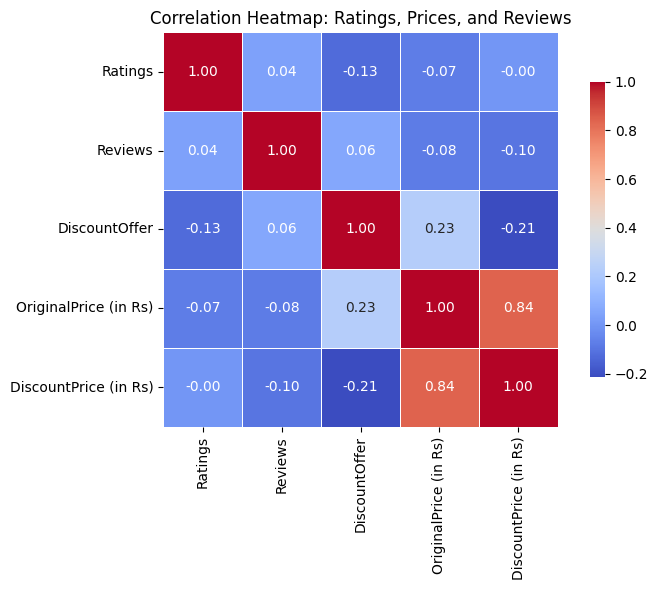

In [19]:
# Select numeric features for correlation analysis
corr_features = clean_df[[
    'Ratings',
    'Reviews',
    'DiscountOffer',
    'OriginalPrice (in Rs)',
    'DiscountPrice (in Rs)'
]].dropna()

corr_matrix = corr_features.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={'shrink': 0.75},
    linewidths=0.5
)
plt.title("Correlation Heatmap: Ratings, Prices, and Reviews")
plt.tight_layout()
plt.show()


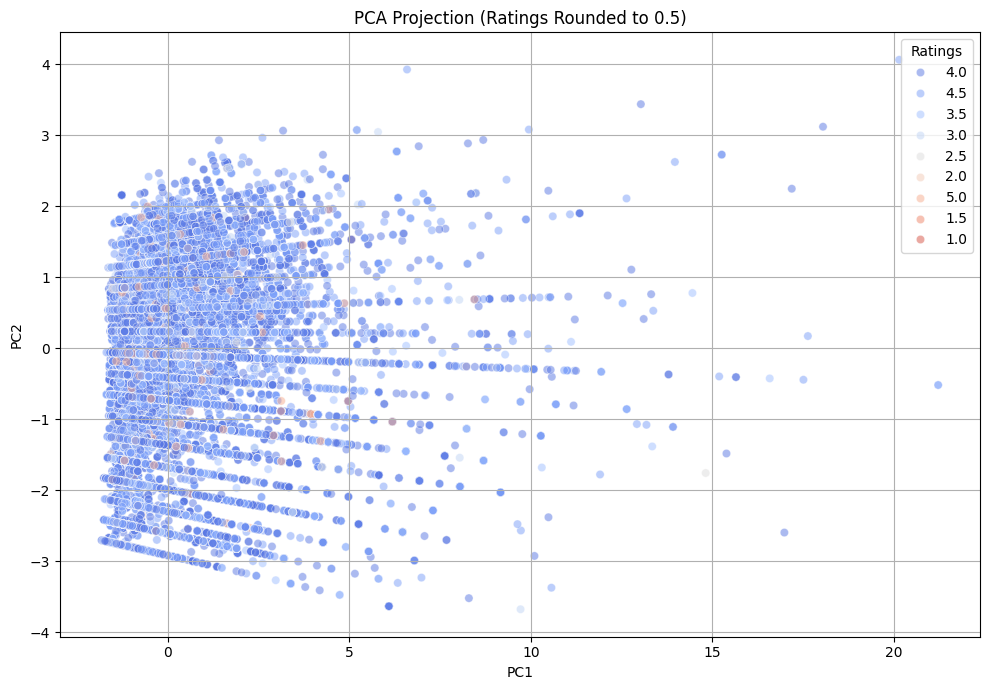

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare and clean data
pca_input = clean_df[['DiscountOffer', 'OriginalPrice (in Rs)', 'DiscountPrice (in Rs)', 'Ratings']].dropna().copy()

# Round ratings to nearest 0.5
pca_input['RatingsRounded'] = (pca_input['Ratings'] * 2).round() / 2

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_input[['DiscountOffer', 'OriginalPrice (in Rs)', 'DiscountPrice (in Rs)']])

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Combine PCA and rounded ratings
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Ratings'] = pca_input['RatingsRounded'].astype(str)

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Ratings', palette='coolwarm', alpha=0.5)
plt.title("PCA Projection (Ratings Rounded to 0.5)")
plt.grid(True)
plt.tight_layout()
plt.show()